In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action="ignore")

In [3]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### EDA

In [4]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

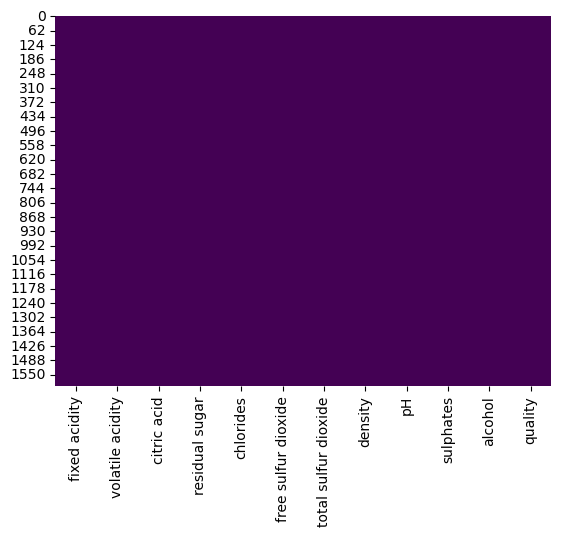

In [5]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Calculate the sum of each quality indexes
counts = df["quality"].value_counts()
counts.name = "Count"
percs = df["quality"].value_counts(normalize=True)
percs.name = "Percentage"

pd.concat([counts, percs], axis=1)

,Count,Percentage
5,681,0.425891
6,638,0.398999
7,199,0.124453
4,53,0.033146
8,18,0.011257
3,10,0.006254


<AxesSubplot:ylabel='quality'>

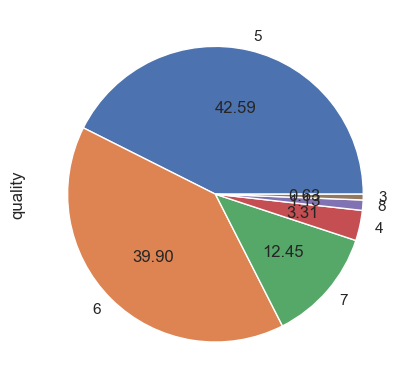

In [145]:
y.value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'quality distribution')

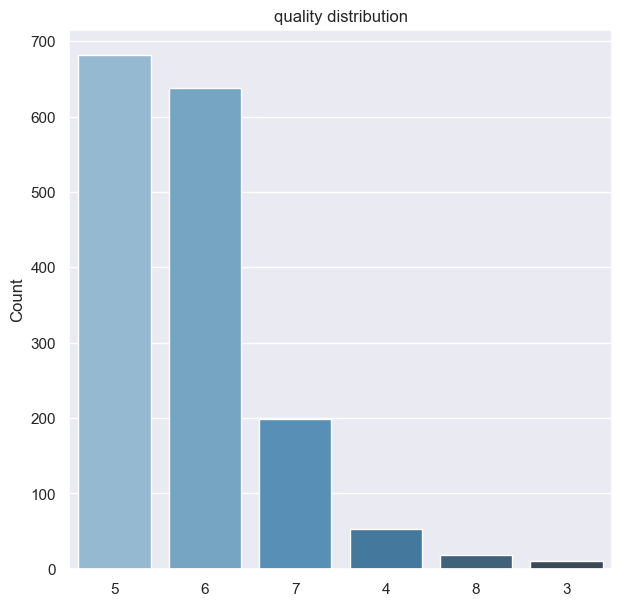

In [8]:
# Plot quality distribution

distribution = pd.DataFrame(list(df['quality'].value_counts()),
                          index=['5', '6', '7', '4', '8', '3' ],
                          columns=['Count'])
sns.set()
plt.figure(figsize=(7, 7))
sns.barplot(x=distribution.index, y=distribution.Count, 
           palette="Blues_d")
plt.title('quality distribution')

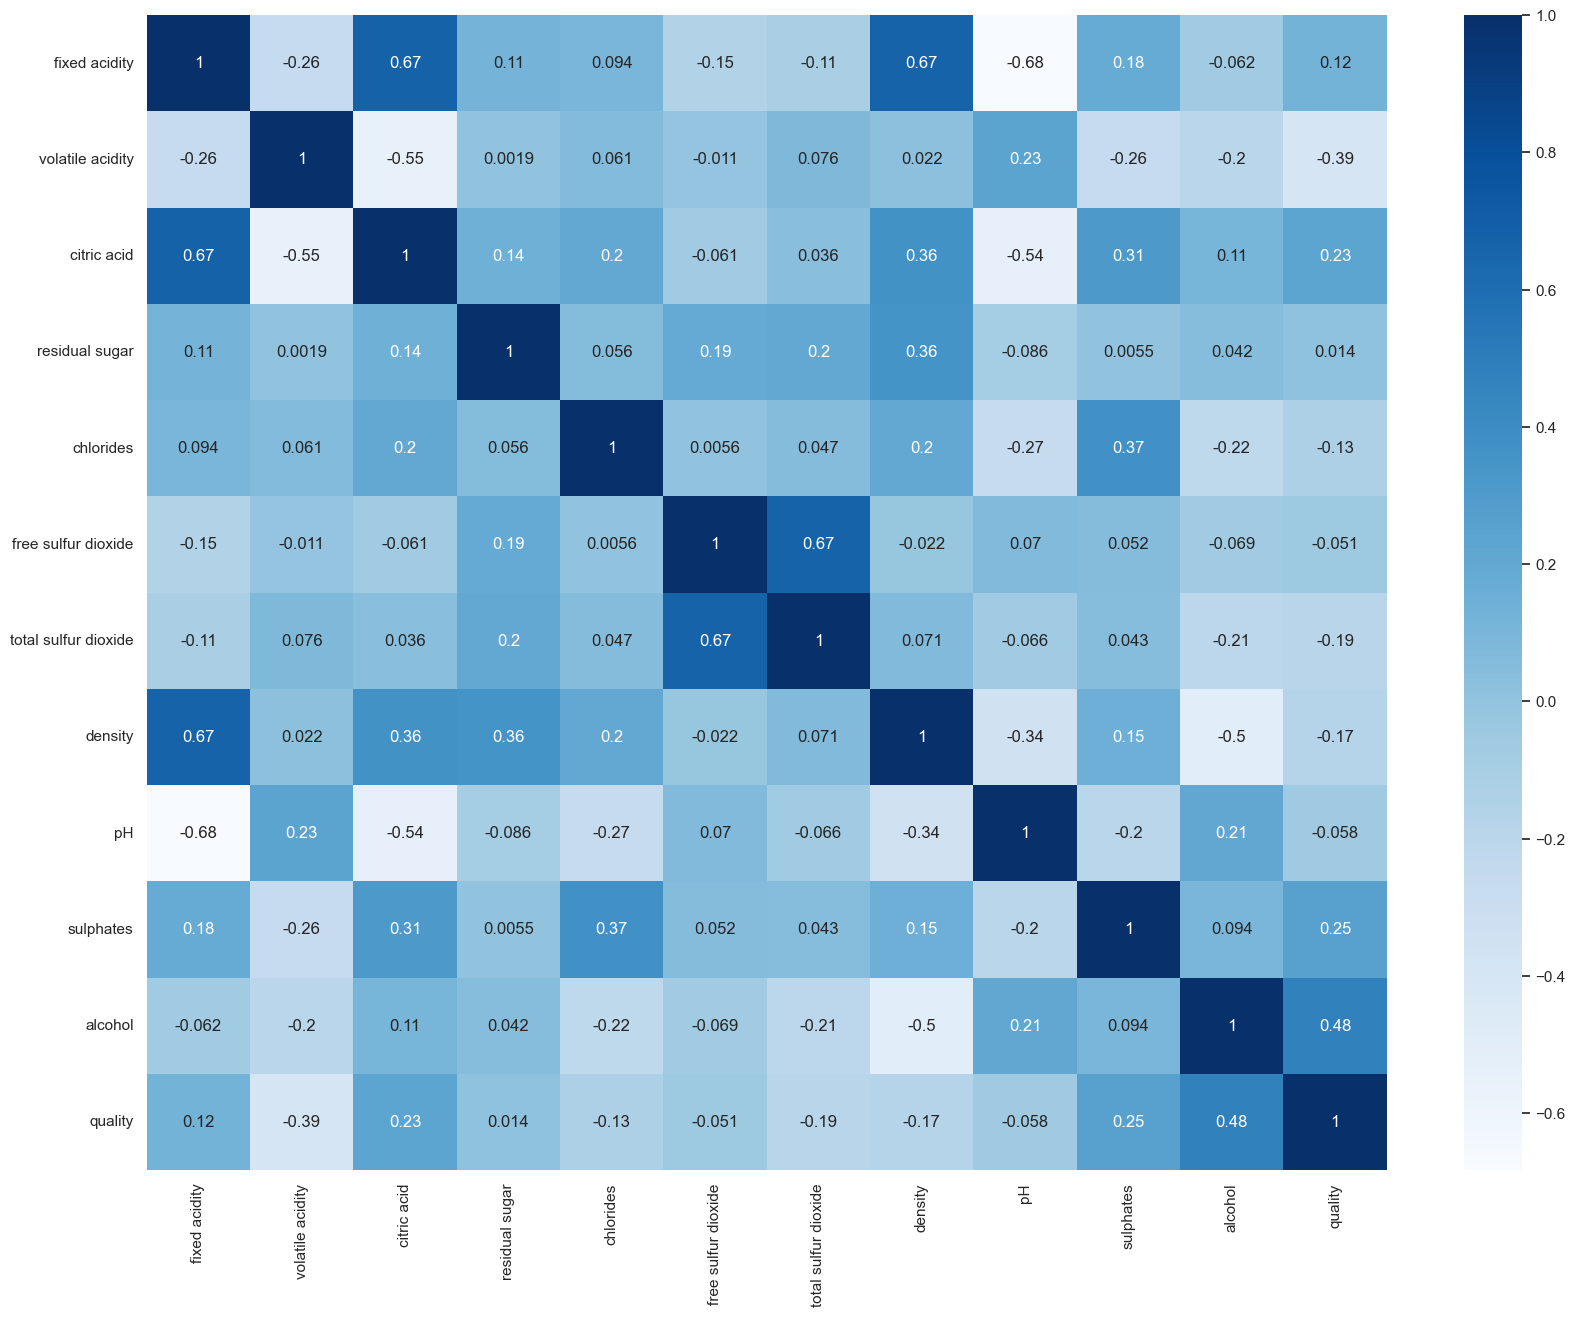

In [9]:
# correlation plot
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap ="Blues", annot=True)
plt.show()

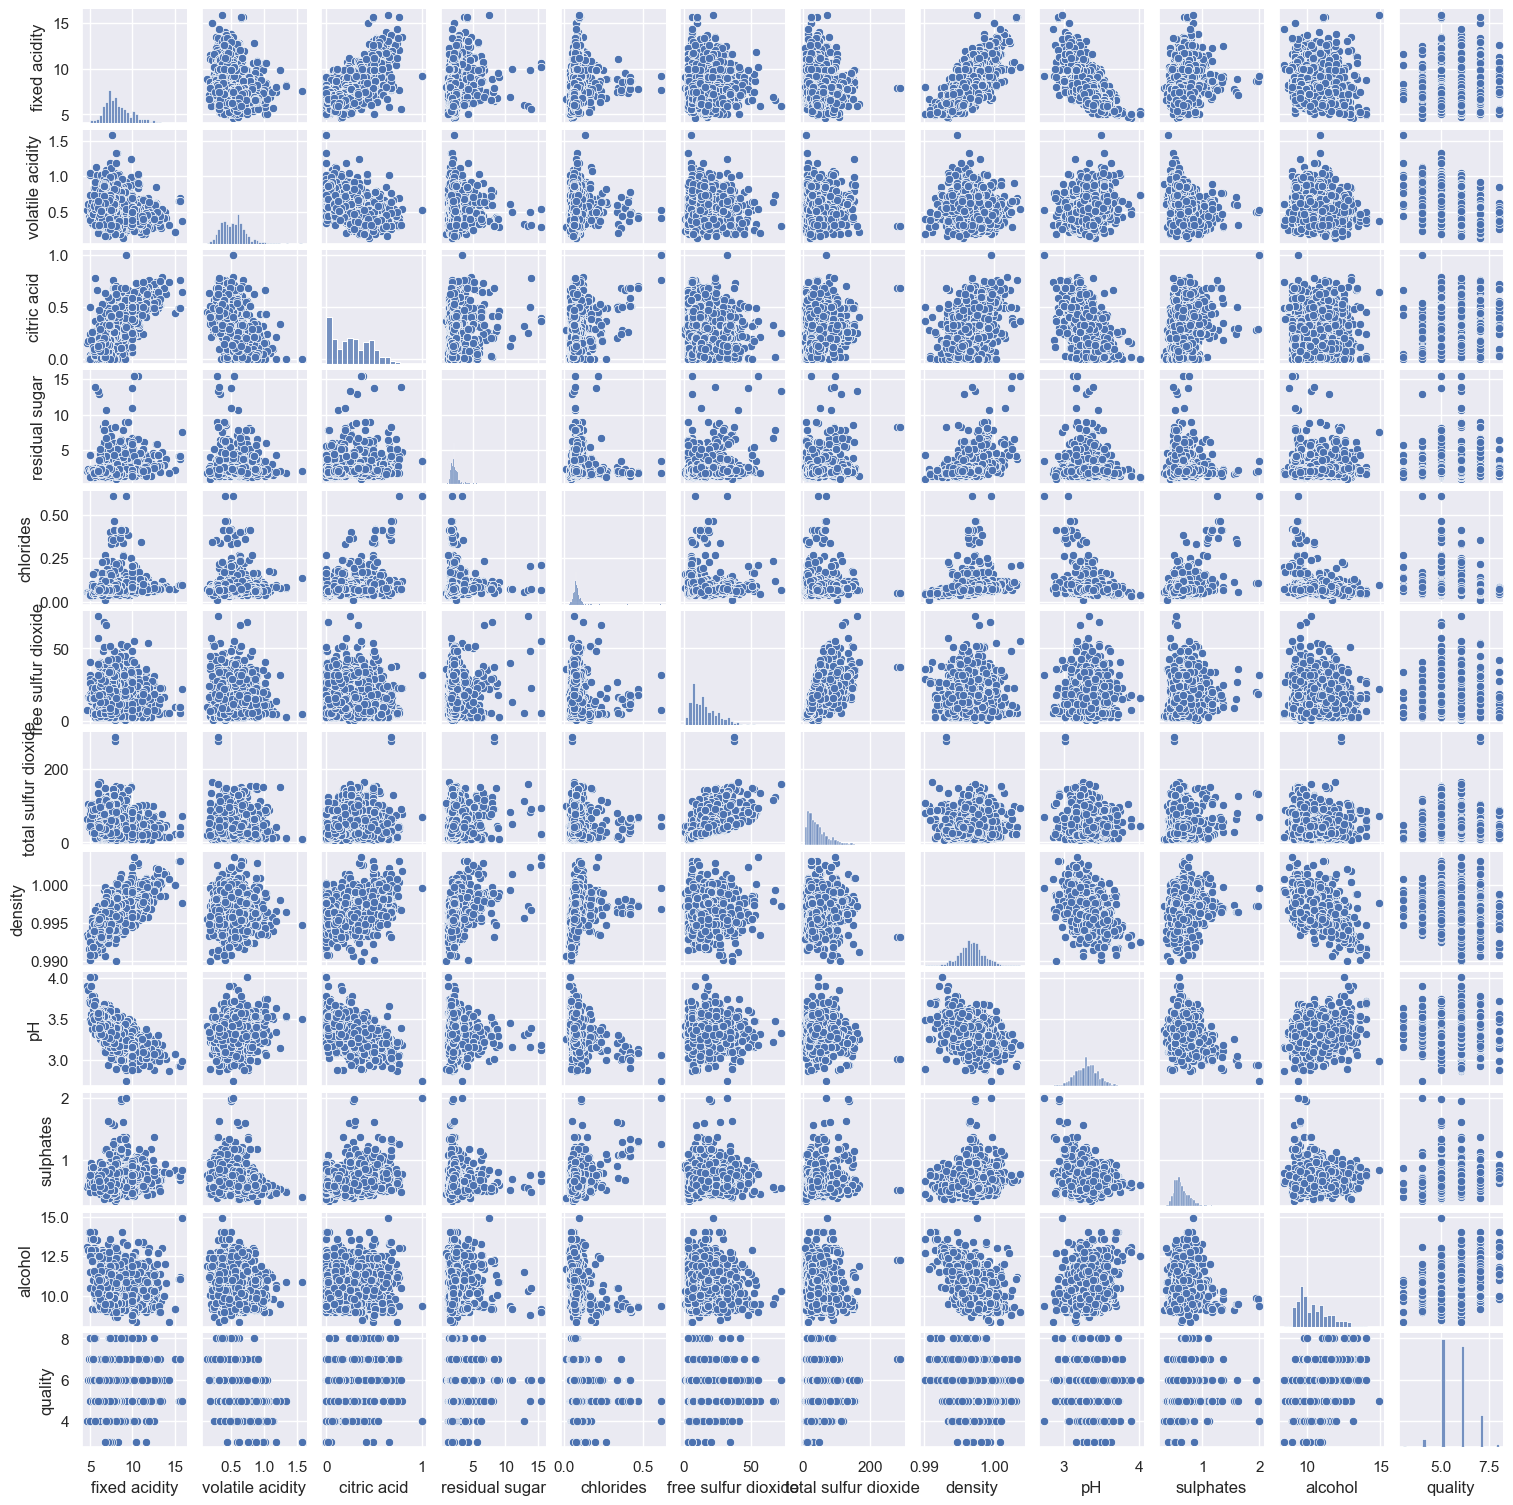

In [10]:
pair = sns.pairplot(df)
pair.fig.set_size_inches(15,15)

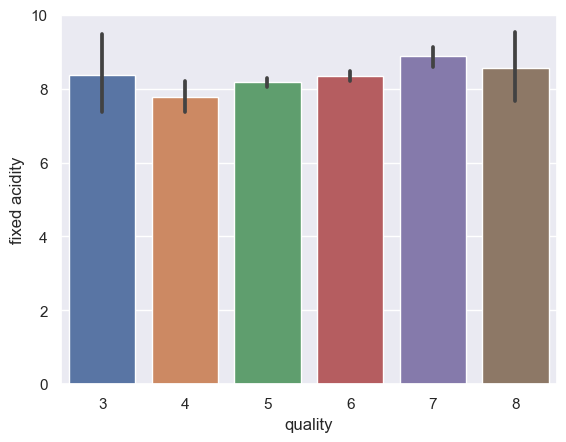

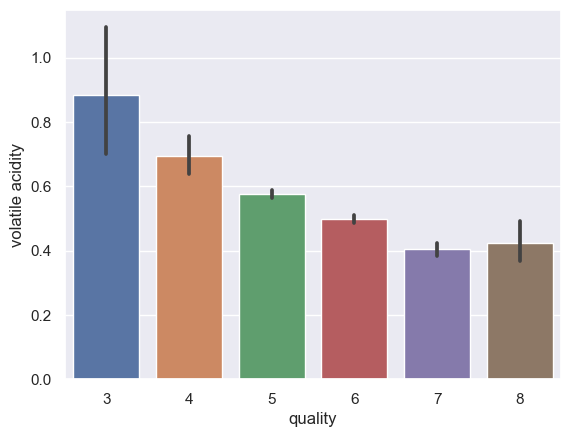

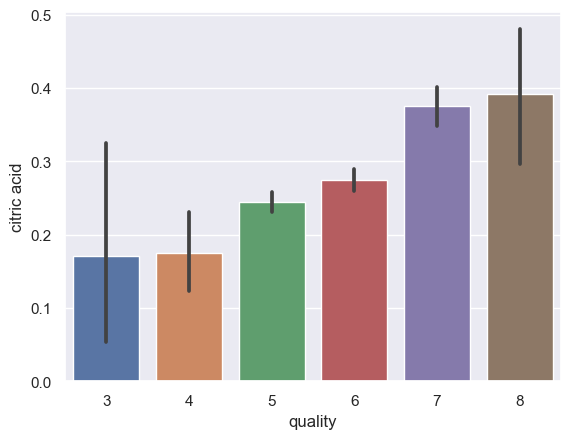

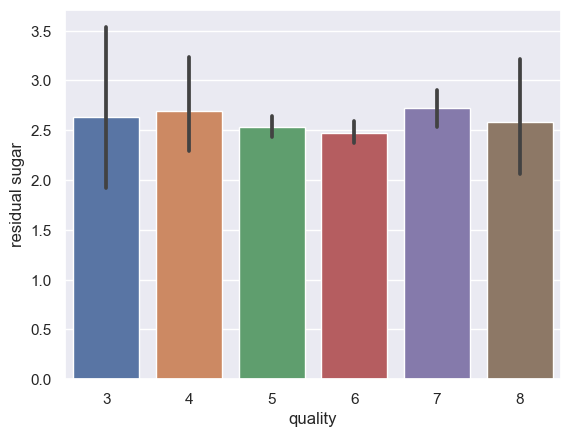

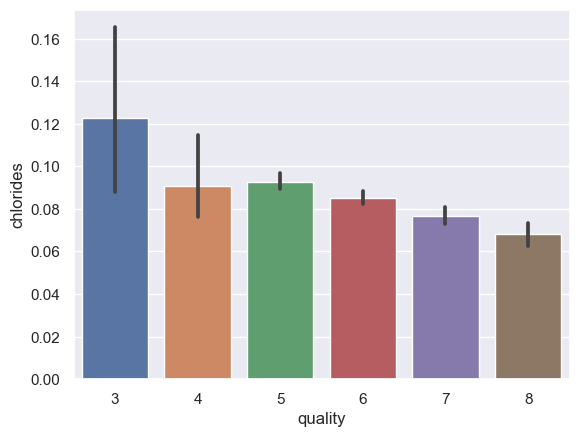

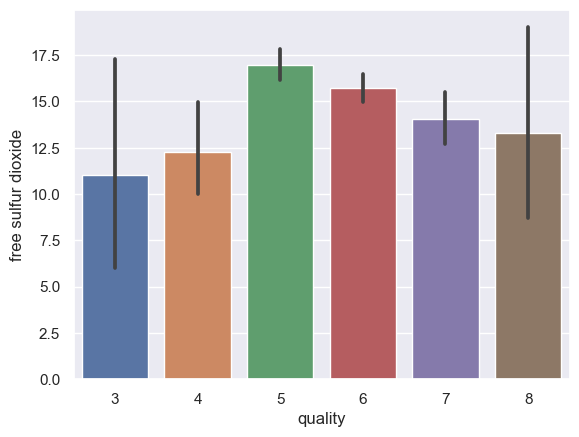

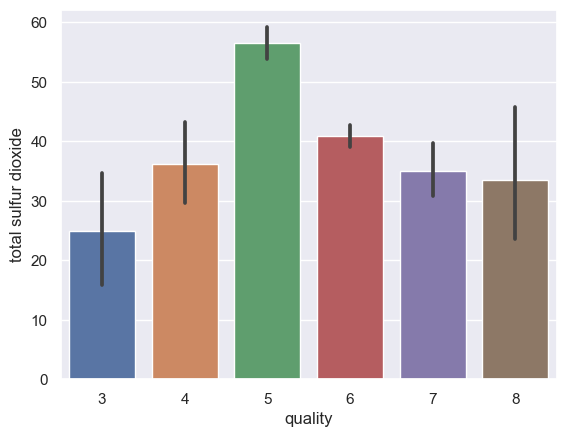

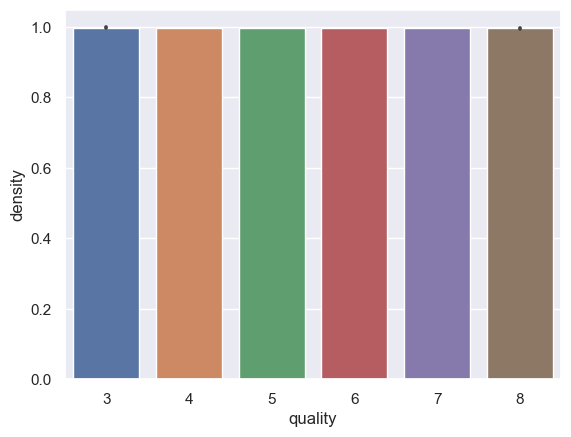

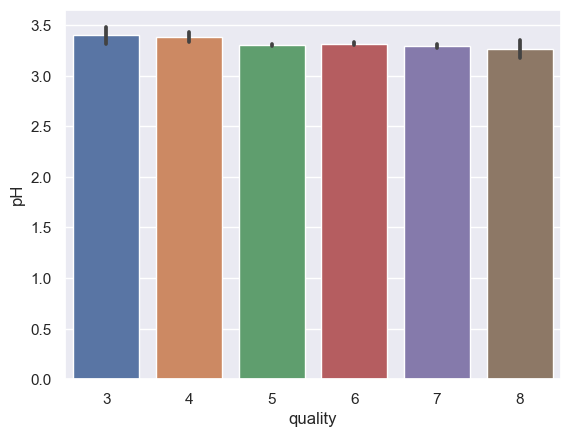

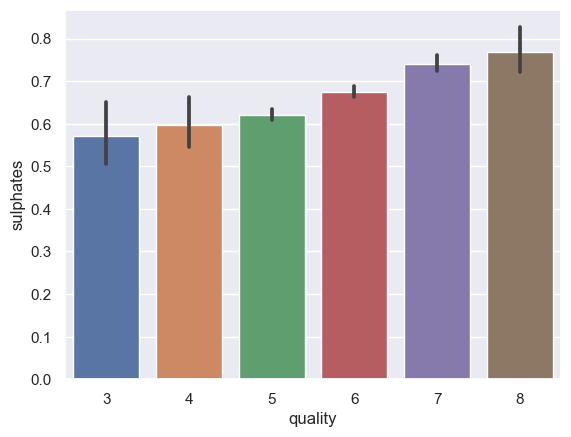

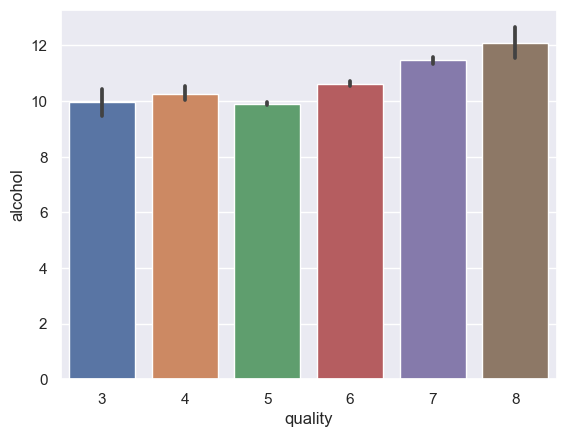

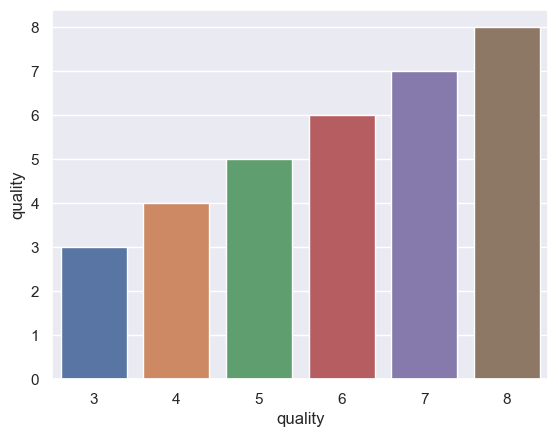

In [13]:
df1 = df.select_dtypes([np.int, np.float])

for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y = col, data=df1)

### 1.How does fixed acidity affect quality?

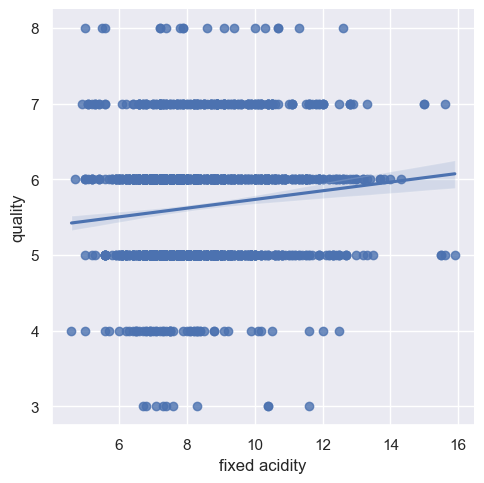

In [15]:
sns.lmplot(x="fixed acidity", y="quality",data=df)

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

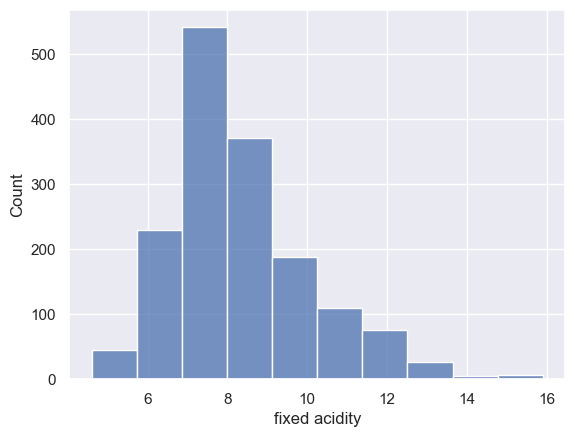

In [11]:
#checking the distribution of fixed acidity
sns.histplot((df['fixed acidity']),bins=10)

                    The distribution is positively skewed.

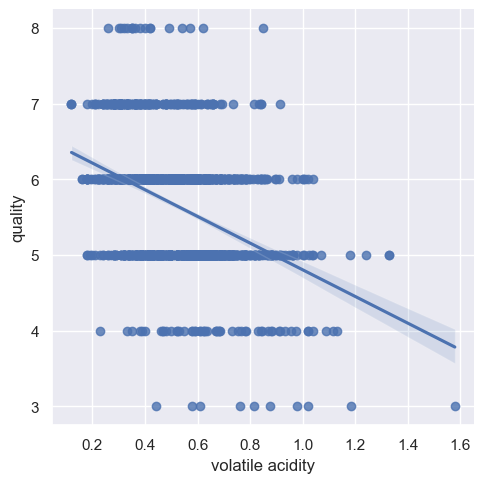

In [16]:
sns.lmplot(x="volatile acidity", y="quality", data=df)

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

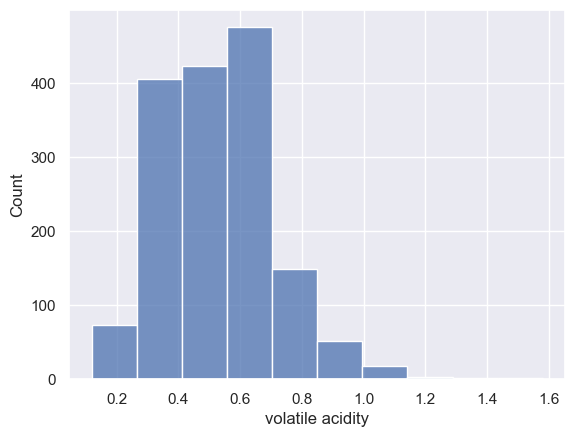

In [17]:
#checking the distribution of fixed acidity
sns.histplot((df['volatile acidity']),bins=10)

                The distribution is positively skewed

### Checking for outliers

<AxesSubplot:xlabel='fixed acidity'>

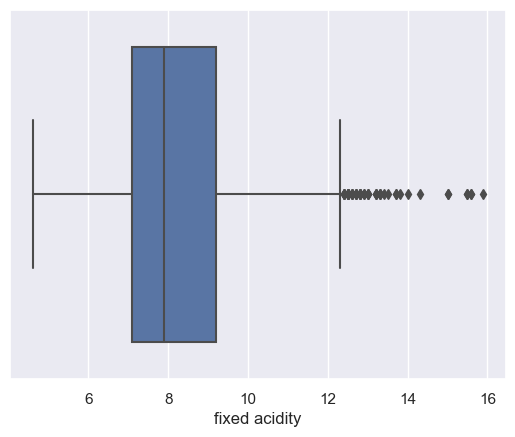

In [12]:
sns.boxplot(df['fixed acidity'])

In [13]:
df['fixed acidity'].mean()

8.319637273295838

In [14]:
df1=df[df['fixed acidity']<11.9]

<AxesSubplot:xlabel='fixed acidity'>

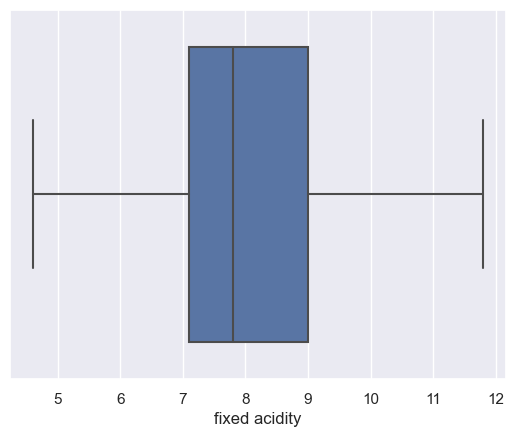

In [15]:
sns.boxplot(df1['fixed acidity'])

In [16]:
#Unique values in density
df1.density.value_counts()

0.99720    36
0.99680    35
0.99760    33
0.99620    28
0.99800    27
           ..
0.99544     1
0.99509     1
0.99270     1
0.99434     1
0.99651     1
Name: density, Length: 424, dtype: int64

(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

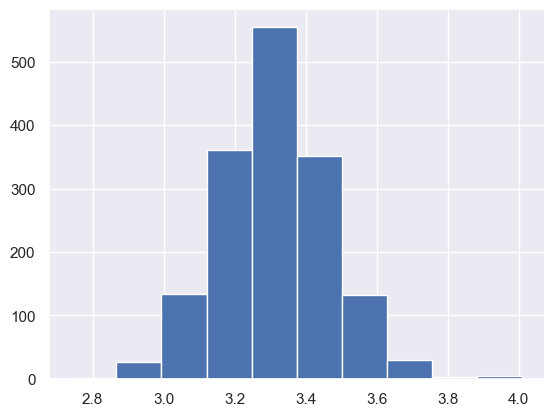

In [17]:
plt.hist(df['pH'], bins=10)

### Relation Between 'alcohol' and 'quantity'

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

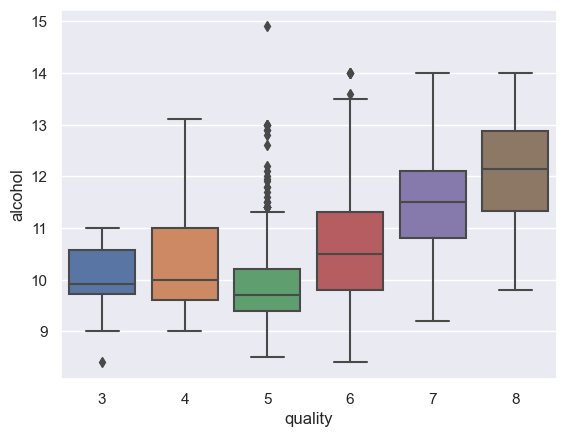

In [18]:
sns.boxplot(x='quality',y='alcohol',data=df)

In [29]:
# labels
y = df['quality']

# features
X = df.drop('quality', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [51]:
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform( X_test)

### LOGISTIC REG

In [64]:

lr = LogisticRegression(random_state=0)

In [65]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [86]:
pred_lr = lr.predict(X_test)

In [100]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.33      0.33         6
           5       0.71      0.75      0.73        64
           6       0.71      0.64      0.68        73
           7       0.38      0.43      0.40        14
           8       0.33      0.50      0.40         2

    accuracy                           0.65       160
   macro avg       0.41      0.44      0.42       160
weighted avg       0.66      0.65      0.65       160



### DECISION TREE

In [96]:
tree = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

In [97]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [98]:
pred_tree = tree.predict(X_test)

In [121]:
print('Logistic Regression:',lr.score(X_train,y_train))

Logistic Regression: 0.6052814454482279


### svm

In [105]:
svm= SVC(kernel = 'linear', random_state=0)

In [106]:
svm.fit(X_train, y_train,)

SVC(kernel='linear', random_state=0)

In [107]:
pred_svm = svm.predict(X_test)

In [120]:
print('SVM:',svm.score(X_train,y_train))

SVM: 0.5823488533703961


### Random forest

In [147]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

[[ 0  0  1  0  0  0]
 [ 0  0  4  2  0  0]
 [ 0  0 55  9  0  0]
 [ 0  0 17 50  6  0]
 [ 0  0  0  8  6  0]
 [ 0  0  0  1  1  0]]


<Figure size 1000x600 with 0 Axes>

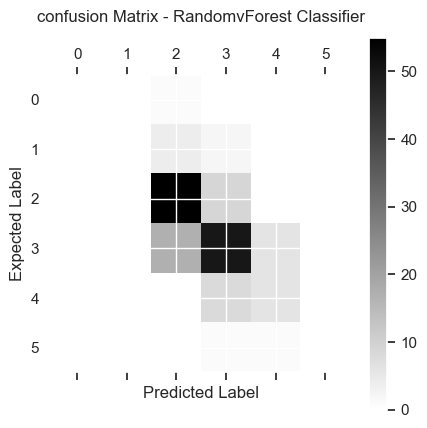

In [152]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("confusion Matrix - RandomvForest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [156]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred == y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy :", sum(y_pred == y_test)*100 / len(y_pred, "%"))

Total Predictions :  160
Correct Prediction :  111
Incorrect Prediction :  49


TypeError: len() takes exactly one argument (2 given)

In [101]:
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)  

In [102]:
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [103]:
pred_RF = RF.predict(X_test)

In [119]:
print('Random Forest Classifier Training Accuracy:',RF.score(X_train,y_train))

Random Forest Classifier Training Accuracy: 0.990271021542738


### NAIVE_BAYES algorithm

In [129]:
NBmodel = GaussianNB()

In [130]:
#fitting the Naive_Bayes model
NBmodel.fit(X_train, y_train)



GaussianNB()

In [131]:
print('Naive Bayes Classifier Training Accuracy:',NBmodel.score(X_train,y_train))

Naive Bayes Classifier Training Accuracy: 0.5545517720639332


In [140]:
names = ['lr' , 'tree' , 'svm', 'RF', 'NBmodel'
         ]

In [133]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=42),
    SVC(),
    RandomForestClassifier(),
    GaussianNB()
    ]

In [136]:
from sklearn import metrics
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
   # accuracy  = metrics.accuracy_score(y_train, y_pred)
    #precision = metrics.precision_score(y_train, y_pred, average='weighted')
    #recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    #f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, f1, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'F1 Train', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting lr model...
... predicting
... scoring
Fitting tree model...
... predicting
... scoring
Fitting svm model...
... predicting
... scoring
Fitting RF model...
... predicting
... scoring
Fitting NBmodel model...
... predicting
... scoring
... All done!


In [137]:
results.sort_values('F1 Train', ascending=False)

,F1 Train,Train Time
Classifier,,
tree,1.000000,0.007720
RF,1.000000,0.214479
svm,0.650849,0.120303
lr,0.586343,0.052339
NBmodel,0.555335,0.000492


<AxesSubplot:xlabel='Classifier'>

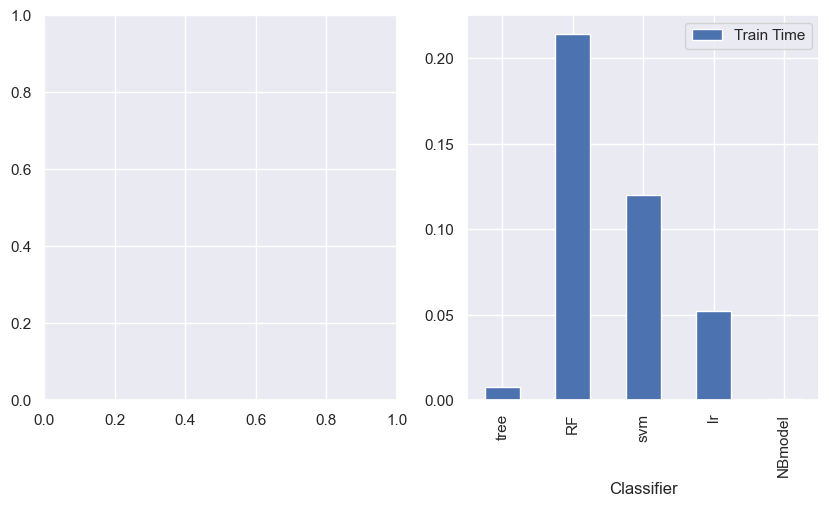

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
#results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.70,1.00])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### Random Forest is the most favoured algorithm with the Training Accuracy of 99%